In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

In [142]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [54]:
df = pd.read_csv( 'Bank_Personal_Loan_Modelling-1.csv' ,sep=',' )
df.columns = ['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard']
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [55]:
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#Min experience is showing negative values, which is incorrect, so we have to clean that column.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                   5000 non-null int64
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


C:\Users\adits\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\adits\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


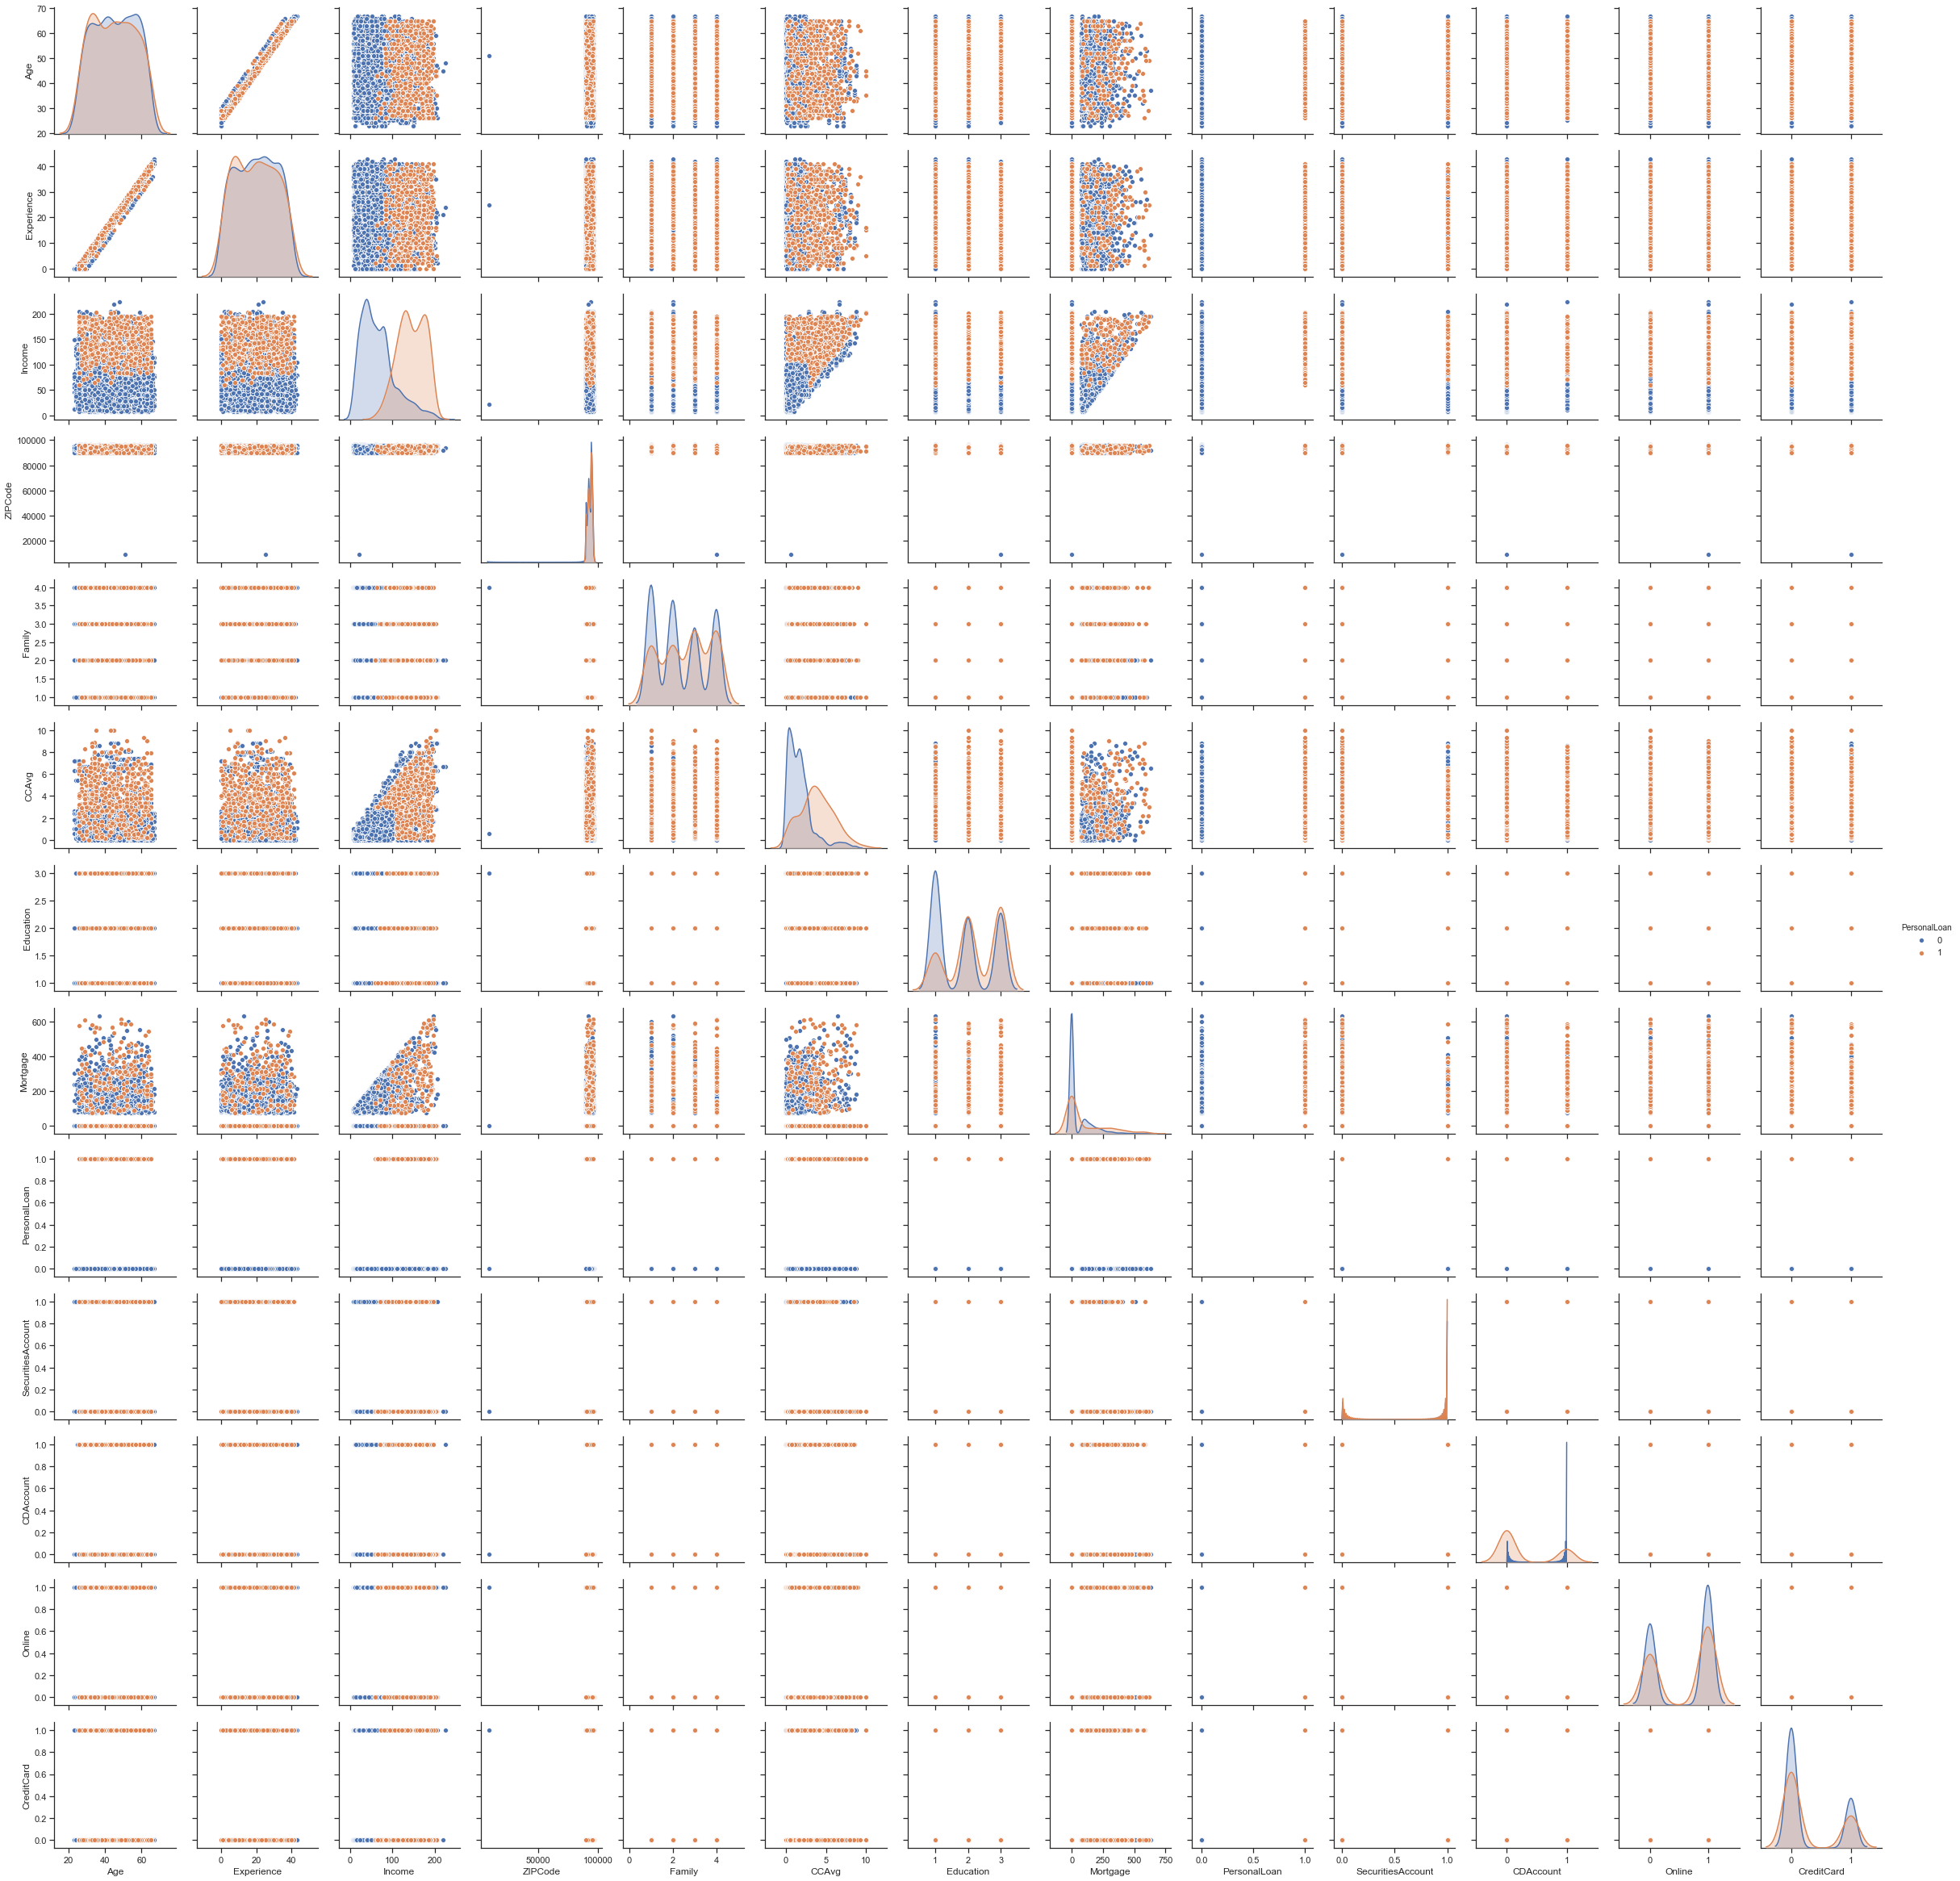

In [89]:
sns.pairplot(df.drop('ID',axis=1),hue='PersonalLoan')

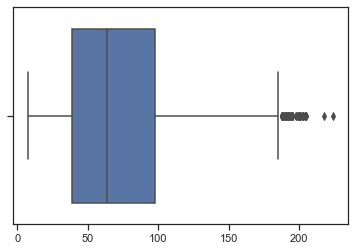

In [86]:
sns.boxplot(df[['Income']])

there are few outlier at right side of the distribution clearly shown in boxplot 

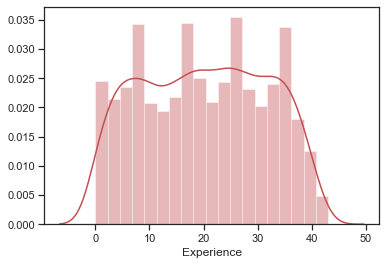

In [90]:
sns.distplot( df['Experience'], color = 'r')

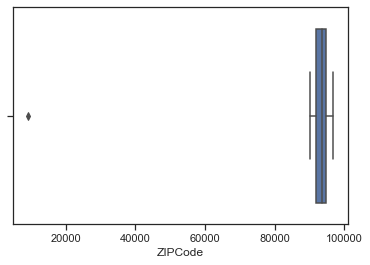

In [60]:
sns.boxplot(df['ZIPCode'])

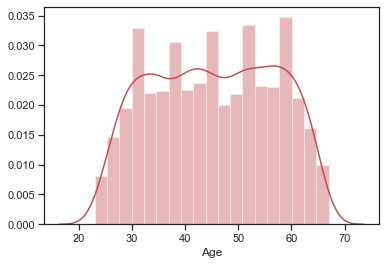

In [61]:
sns.distplot( df['Age'], color = 'r')

### Observation:
Most of the customers age fall in the age range of 30 to 60 years and their experience fall in the range of 5 to 35 years and most earn an income between 10K to 100K.

Cleaning Experience data

In [62]:
for i, row in df.iterrows():
        if row["Experience"] < 0:
            df["Experience"][i] = 0

C:\Users\adits\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.119600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.440484,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Influence of various attributes on whether a customer takes a personal loan across the education levels. 

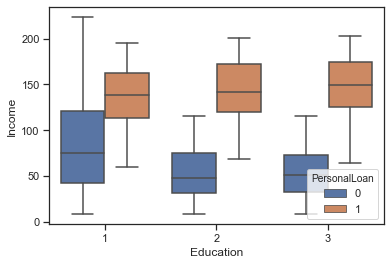

In [64]:
sns.boxplot(x="Education", y="Income", hue="PersonalLoan", data=df)

### Observation:
The box plots show that those with education level 1 have higher incomes.  But customers who go for personal loans have the same income distribution regardless of the education level.

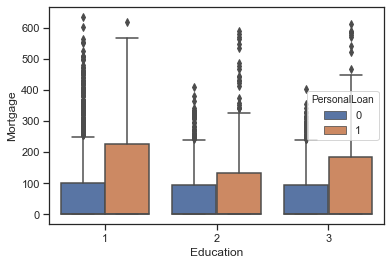

In [66]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=df)

### Observation:
Customers who taken loan also have higher mortgages.

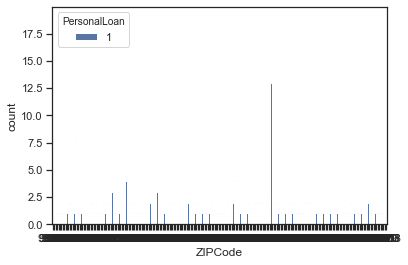

In [67]:
sns.countplot(x="ZIPCode", data=df[df.PersonalLoan==1], hue ="PersonalLoan",orient ='v')

In [69]:
zipcode_top_five = df[df.PersonalLoan==1]['ZIPCode'].value_counts().head(5)
zipcode_top_five

94720    19
94305    13
92093     9
90095     8
90089     8
Name: ZIPCode, dtype: int64

### Observation:
Top 5 locations who appled personal loan before 

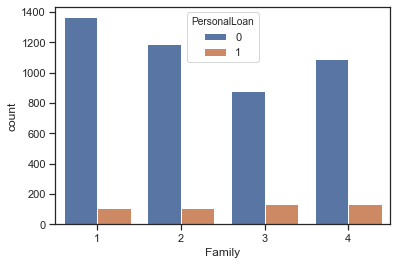

In [70]:
sns.countplot(x="Family", data=df,hue="PersonalLoan")

### Observation:
### Does family size have any influence on whether a customer accepts a personal loan offer?

In [71]:
familysize_no = np.mean( df[df.PersonalLoan == 0]['Family'] )
familysize_no

2.3734513274336284

In [88]:
familysize_yes = np.mean( df[df.PersonalLoan == 1]['Family'] )
familysize_yes

2.6125

### Observation :
Family size seems to have no impact on decision to take a loan.

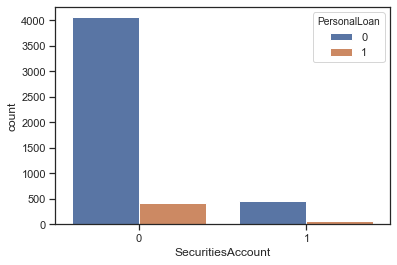

In [75]:
sns.countplot(x="SecuritiesAccount", data=df,hue="PersonalLoan")

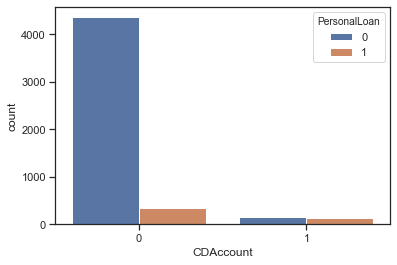

In [76]:
sns.countplot(x="CDAccount", data=df,hue="PersonalLoan")

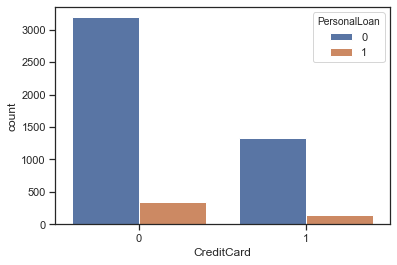

In [77]:
sns.countplot(x="CreditCard", data=df,hue="PersonalLoan")

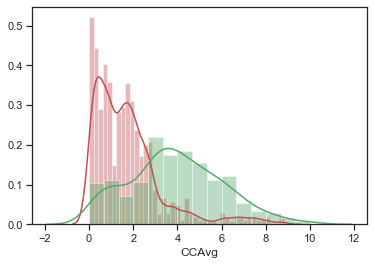

In [78]:
sns.distplot( df[df.PersonalLoan == 0]['CCAvg'], color = 'r')
sns.distplot( df[df.PersonalLoan == 1]['CCAvg'], color = 'g')

### Observation:
Customers who have taken personal loan have higher credit card average than those who did nottake.  So high credit card average seems to be good predictor of whether or not a customer will take a personal loan.

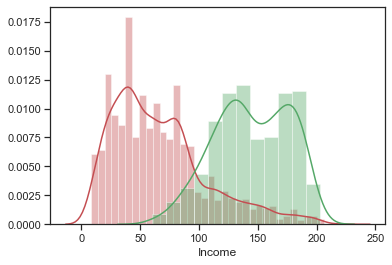

In [79]:
sns.distplot( df[df.PersonalLoan == 0]['Income'], color = 'r')
sns.distplot( df[df.PersonalLoan == 1]['Income'], color = 'g')

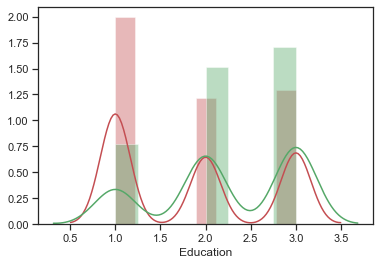

In [80]:
sns.distplot( df[df.PersonalLoan == 0]['Education'], color = 'r')
sns.distplot( df[df.PersonalLoan == 1]['Education'], color = 'g')

### Splitting Data to Train And Test

In [108]:
from sklearn.model_selection import train_test_split
X = df.drop(['PersonalLoan','ID' ,'CCAvg'],axis=1)
y = df['PersonalLoan']

In [109]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=.30)

## Logistic Regression

In [137]:
#Create Logistic Regression Classifier
lr_model = LogisticRegression()

#Train the model using the training sets
lr_model.fit(train_set, train_labels)

C:\Users\adits\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
y_predict = lr_model.predict(test_set)
print('Model score - train set:',lr_model.score(train_set , train_labels))
print('Model score - test set:',lr_model.score(test_set , test_labels))

# calculate accuracy measures and confusion matrix
from sklearn import metrics
print('Confusion matrix:',metrics.confusion_matrix(test_labels, y_predict))

Model score - train set: 0.9082857142857143
Model score - test set: 0.908
Confusion matrix: [[1316   43]
 [  95   46]]


## KNN Classifier

In [139]:
#Create KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=4)

#Train the model using the training sets
knn_model.fit(train_set, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [140]:
y_predict = knn_model.predict(test_set)
print('Model score - train set:',knn_model.score(train_set , train_labels))
print('Model score - test set:',knn_model.score(test_set , test_labels))

# calculate accuracy measures and confusion matrix
from sklearn import metrics
print('Confusion matrix:',metrics.confusion_matrix(test_labels, y_predict))

Model score - train set: 0.9237142857142857
Model score - test set: 0.9013333333333333
Confusion matrix: [[1335   24]
 [ 124   17]]


## Naive Bayes Classifier

In [143]:
sc = StandardScaler()

sc.fit(train_set)

# Scale the training data to be of mean 0 and of unit variance
train_set_std = sc.transform(train_set)

# Scale the test data to be of mean 0 and of unit variance
test_set_std = sc.transform(test_set)

In [144]:
nb_model = GaussianNB()
nb_model.fit(train_set_std, train_labels)

GaussianNB(priors=None, var_smoothing=1e-09)

In [145]:
y_predict = nb_model.predict(test_set)
print('Model score - train set:',nb_model.score(train_set , train_labels))
print('Model score - test set:',nb_model.score(test_set , test_labels))

# calculate accuracy measures and confusion matrix
from sklearn import metrics
print('Confusion matrix:',metrics.confusion_matrix(test_labels, y_predict))


Model score - train set: 0.9031428571428571
Model score - test set: 0.906
Confusion matrix: [[1359    0]
 [ 141    0]]


# best model and why

from all above model according to me and accury outcome 'Logistic Model' is the best model as compare to other two models.logistic model and navie bayes model perform better than knn model because they compute probablity in the range of 0 and 1 on the other hand KNN model follow majority voting mechanisms.